# Introduction to Yolov8 for custom data

# Act I. Making a prediction on foundation model

NB !ED! change runtime type to GPU omg!

In [1]:
# It should "just work"
!pip install ultralytics
!pip install opencv-python
import cv2
from IPython.display import display, Image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.0/646.0 kB 7.8 MB/s eta 0:00:00


In [2]:
#command line way.  "This is the way (but not the easiest way)."
!yolo task=detect \
mode=predict \
model=yolov8n.pt \
conf=0.25 \
source='edowl.png'

100% 6.23M/6.23M [00:00<00:00, 67.6MB/s]
Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/edowl.png: 640x480 1 person, 1 bird, 136.0ms
Speed: 15.3ms preprocess, 136.0ms inference, 42.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [3]:
# function way "This is probably the way"
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.predict(
   source='edowl.png',
   conf=0.25
)


image 1/1 /content/edowl.png: 640x480 1 person, 1 bird, 100.6ms
Speed: 4.4ms preprocess, 100.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

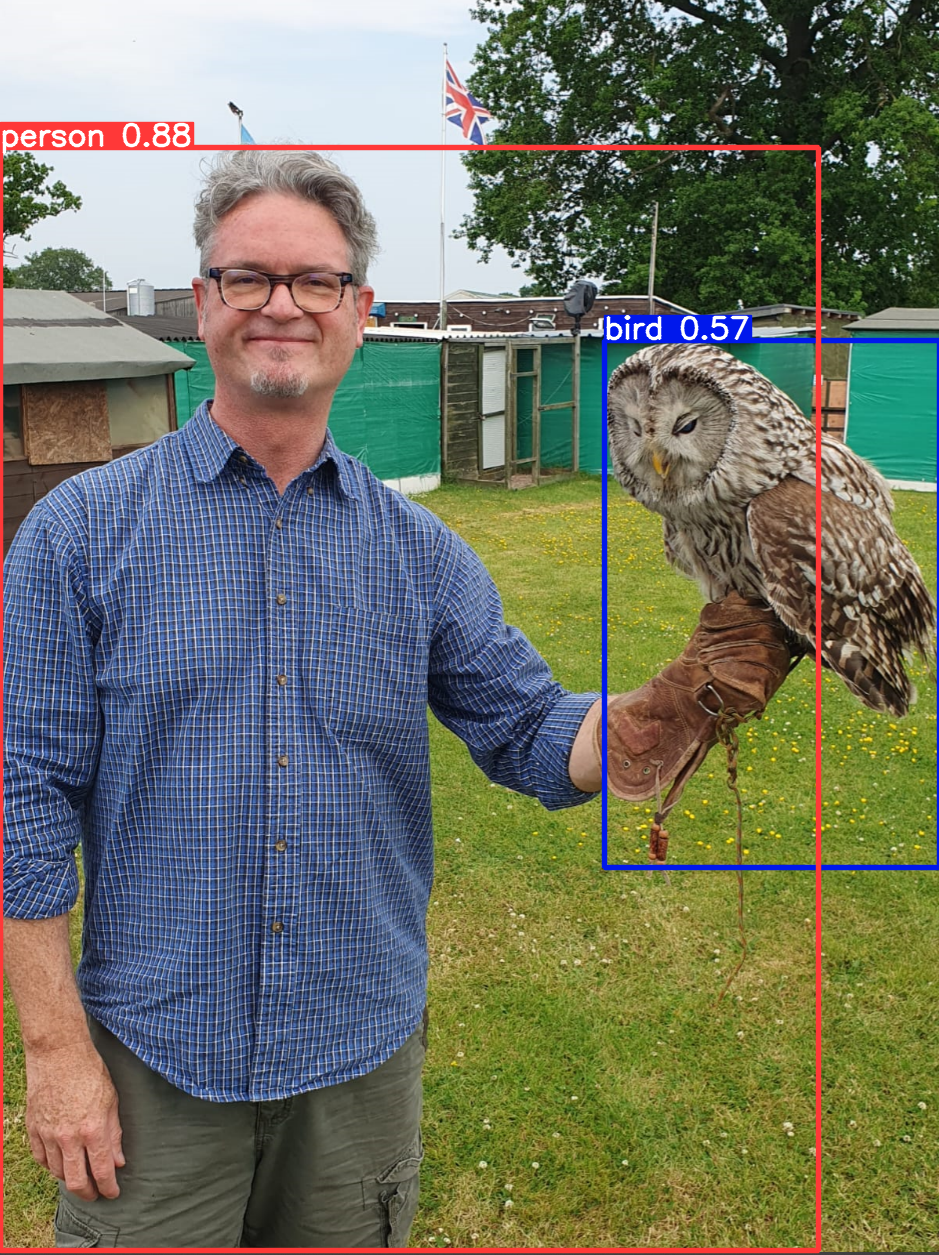

In [4]:
# display your results
display(Image(filename='runs/detect/predict/edowl.png'))

Note: If there is time for an experiment:

1. maybe try a set of weights from a different, better model: https://github.com/ultralytics/ultralytics

2. Try your own picture... just drag and drop.

# Act II. Custom data, Yolo model

## Transfer learning

Transfer learning, used in machine learning, is the reuse of a pre-trained model on a new problem. In transfer learning, a machine exploits the knowledge gained from a previous task to improve generalization about another.

**To do this you need to create your own training data**  

We are going to look at an example today on a platform called Roboflow.  

In [ ]:
# NB API key is fiddley
!pip install roboflow
from roboflow import Roboflow
from google.colab import userdata


In [8]:
rf = Roboflow(api_key=userdata.get('roboflowkey')) # << explain briefly!
project = rf.workspace("roboflow-gw7yv").project("raccoon")
dataset = project.version(38).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.220, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Raccoon-38 in yolov8:: 100%|██████████| 799/799 [00:00<00:00, 8040.91it/s]


In [10]:
!yolo task=detect \
mode = train \
model = yolov8s.pt \
data = /content/Raccoon-38/data.yaml \
epochs = 10 \
imgsz = 640

Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Raccoon-38/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=to

# Readings and sources:


- Redmon, J., Divvala, S., Girshick, R. and Farhadi, A., 2016. You only look once: Unified, real-time object detection. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 779-788).
- https://www.cv-foundation.org/openaccess/content_cvpr_2016/html/Redmon_You_Only_Look_CVPR_2016_paper.html

Joseph Redmon et al. presents YOLO, a novel approach to object detection framing it as a regression problem, predicting bounding boxes and class probabilities from full images in a single network evaluation. YOLO is unique for its speed, processing images in real-time, and its unified architecture, which allows for end-to-end optimization directly on detection performance, making it significantly faster and more accurate than existing detection systems.



- Jiang, P., Ergu, D., Liu, F., Cai, Y. and Ma, B., 2022. A Review of Yolo algorithm developments. Procedia Computer Science, 199, pp.1066-1073.
- https://www.sciencedirect.com/science/article/pii/S1877050922001363

A comprehensive overview of the development and advancements of the You Only Look Once (YOLO) algorithm and its versions, focusing on their differences, features, and performance improvements in object detection. It highlights YOLO's evolution from its initial version to advanced iterations like YOLO V5, discussing their architectural changes, efficiency in detecting objects, and contributions to the field of object detection, particularly in applying and enhancing features for accuracy and detector performance.


- https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/

Tutorial on training the YOLOv8 model, the latest in the YOLO series, known for its object detection, instance segmentation, and image classification capabilities. The article guides readers through the process of using the new API to prepare a dataset and train and validate the YOLOv8 model on a custom dataset​.